<a href="https://colab.research.google.com/github/NAWRAJBASNET/python-program/blob/main/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 32
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:


# # Define your directories
# train_dir = "/content/cats_and_dogs/train"
# validation_dir = "/content/cats_and_dogs/validation"
# test_dir = "/content/cats_and_dogs/test"

# # Define your batch size and image dimensions
# batch_size = 32
# IMG_HEIGHT = 150
# IMG_WIDTH = 150

# # Rescaling the images
# train_image_generator = ImageDataGenerator(rescale=1.0/255)
# validation_image_generator = ImageDataGenerator(rescale=1.0/255)
# test_image_generator = ImageDataGenerator(rescale=1.0/255)

# # Flow data from directories
# train_data_gen = train_image_generator.flow_from_directory(
#     batch_size=batch_size,
#     directory=train_dir,
#     target_size=(IMG_HEIGHT, IMG_WIDTH),
#     class_mode='binary'
# )

# val_data_gen = validation_image_generator.flow_from_directory(
#     batch_size=batch_size,
#     directory=validation_dir,
#     target_size=(IMG_HEIGHT, IMG_WIDTH),
#     class_mode='binary'
# )

# # Ensure the test directory has at least one class folder
# if len(os.listdir(test_dir)) == 0:
#     print(f"No classes found in {test_dir}. Please check the directory.")

# # Test data generation (ensure class folder exists)
# test_data_gen = test_image_generator.flow_from_directory(
#     batch_size=batch_size,
#     directory=test_dir,
#     target_size=(IMG_HEIGHT, IMG_WIDTH),
#     class_mode=None,
#     shuffle=False
# )
train_image_generator = ImageDataGenerator(rescale=1.0/255)
validation_image_generator = ImageDataGenerator(rescale=1.0/255)
test_image_generator = ImageDataGenerator(rescale=1.0/255)

train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,
    shuffle=False
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


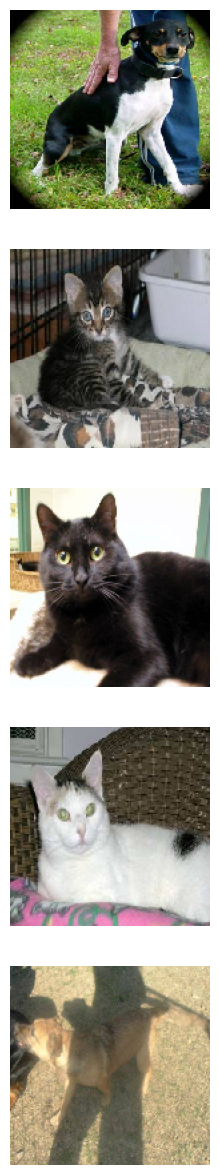

In [7]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [8]:
train_image_generator = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,  # Increase rotation range for more variety
    width_shift_range=0.3,  # Increase width shift range
    height_shift_range=0.3,  # Increase height shift range
    shear_range=0.3,  # Increase shear range
    zoom_range=0.3,  # Increase zoom range
    horizontal_flip=True,
    fill_mode='nearest'
)



Found 2000 images belonging to 2 classes.


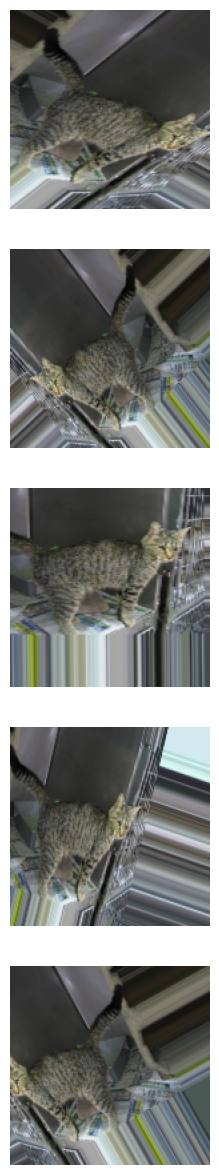

In [9]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),  # New layer to increase complexity
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.6),  # Higher dropout rate to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Use a smaller learning rate for better convergence
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Lower learning rate

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=25,  # Increase epochs from 15 to 25
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.4982 - loss: 0.6990 - val_accuracy: 0.5010 - val_loss: 0.6948
Epoch 2/25
 1/62 ━━━━━━━━━━━━━━━━━━━━ 2:20 2s/step - accuracy: 0.3438 - loss: 0.7008

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3438 - loss: 0.7008 - val_accuracy: 0.3750 - val_loss: 0.7144
Epoch 3/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.5287 - loss: 0.6907 - val_accuracy: 0.6139 - val_loss: 0.6843
Epoch 4/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5938 - loss: 0.6804 - val_accuracy: 0.2500 - val_loss: 0.6957
Epoch 5/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.5720 - loss: 0.6832 - val_accuracy: 0.5948 - val_loss: 0.6679
Epoch 6/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6250 - loss: 0.6622 - val_accuracy: 0.3750 - val_loss: 0.7362
Epoch 7/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.5840 - loss: 0.6745 - val_accuracy: 0.5454 - val_loss: 0.6764
Epoch 8/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5312 - loss: 0.6821 - val_accuracy: 0.6250 - val_loss: 0.7423
Epoch 9/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.5724 - loss: 0.6637 - val_accuracy: 0.5696 - val_loss: 0.6575

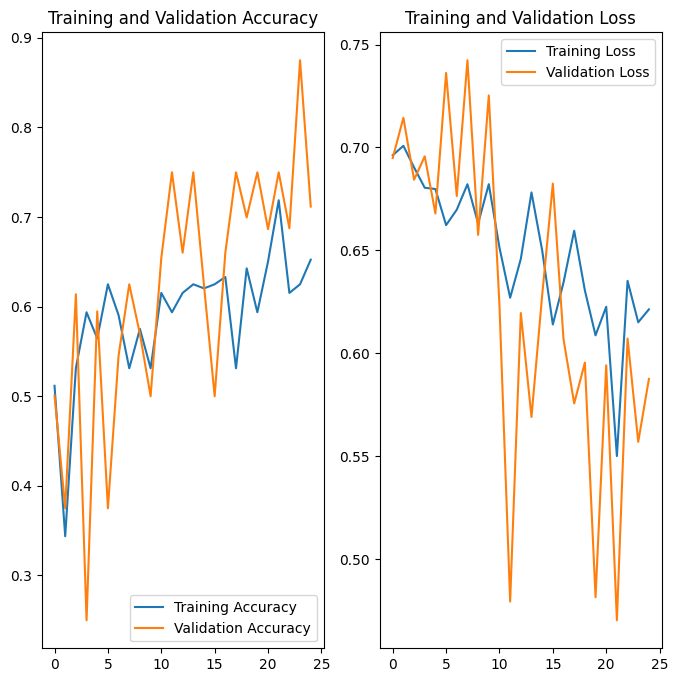

In [18]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Ensure that epochs_range corresponds to the actual number of epochs
epochs_range = range(25)  # or range(15), depending on your epoch count

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 322ms/step


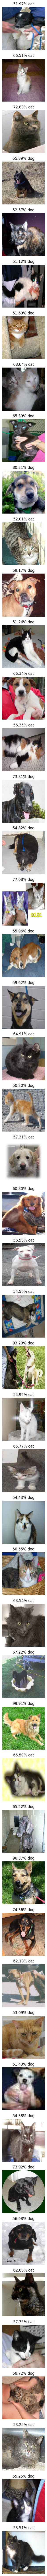

In [19]:
# Predict probabilities for all test images
probabilities = model.predict(test_data_gen).flatten()  # Get predictions and flatten to a list

# Extract all test images from the generator
test_images = []
for i in range(len(test_data_gen)):
    batch_images = test_data_gen[i]  # Fetch a batch
    test_images.extend(batch_images)  # Add batch to test_images list

# Plot test images with probabilities
plotImages(test_images, probabilities)


In [20]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 64.0% of the images of cats and dogs.
You passed the challenge!
